<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Aiyagari" data-toc-modified-id="Aiyagari-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aiyagari</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Find-stationary-equilibrium" data-toc-modified-id="Find-stationary-equilibrium-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Find stationary equilibrium</a></span></li><li><span><a href="#Consumption-functions" data-toc-modified-id="Consumption-functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Consumption functions</a></span></li><li><span><a href="#Stationary-distribution" data-toc-modified-id="Stationary-distribution-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Stationary distribution</a></span></li></ul></li><li><span><a href="#Find-transition-path" data-toc-modified-id="Find-transition-path-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find transition path</a></span></li></ul></div>

**Description:** This is a Jupyter Notebook with Python code. You do not need any knowledge or either Jupyter or Python to run it.

**To run all:** Kernel $\rightarrow$ Restart & Run All

**To run each cell press:**

1. <kbd>Ctrl</kbd>+<kbd>Enter</kbd> to just run the cell
2. <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Enter</kbd> to the run the cell and proceed to the next

# Setup

In [1]:
# import and settings
%matplotlib inline
%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib.pyplot as plt

import context
import numecon.course_macro3.Aiyagari as Aiyagari
%aimport numecon.course_macro3.Aiyagari

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Aiyagari

## Setup

Make a dictionary called **par** with your parameter choices.

In [3]:
par = dict()

Create a **Ramsey model** with the chosen parameters.

In [4]:
model = Aiyagari.AiyagariModel(name='baseline',**par)

## Find stationary equilibrium

In [5]:
model.find_stationary_equilibrium()

find stationary equilibrium (R in [1.03667;1.04667]
  guess on R = 1.03667 -> implied R = 1.04111 (diff =  0.00445)
  guess on R = 1.04667 -> implied R = 0.93117 (diff = -0.11550)
  guess on R = 1.04167 -> implied R = 0.96151 (diff = -0.08015)
  guess on R = 1.03917 -> implied R = 1.00370 (diff = -0.03547)
  guess on R = 1.03792 -> implied R = 1.02449 (diff = -0.01343)
  guess on R = 1.03729 -> implied R = 1.03328 (diff = -0.00401)
  guess on R = 1.03698 -> implied R = 1.03731 (diff =  0.00033)
  guess on R = 1.03714 -> implied R = 1.03532 (diff = -0.00181)
  guess on R = 1.03706 -> implied R = 1.03632 (diff = -0.00074)
  guess on R = 1.03702 -> implied R = 1.03682 (diff = -0.00020)
  guess on R = 1.03700 -> implied R = 1.03706 (diff =  0.00006)
  guess on R = 1.03701 -> implied R = 1.03694 (diff = -0.00007)
 update initial distribution
  guess on R = 1.03667 -> implied R = 1.04111 (diff =  0.00444)
  guess on R = 1.04667 -> implied R = 0.93098 (diff = -0.11569)
  guess on R = 1.04167 

Text(0.5,1,'Convergence to the stationary equilibrium ($k_t$)')

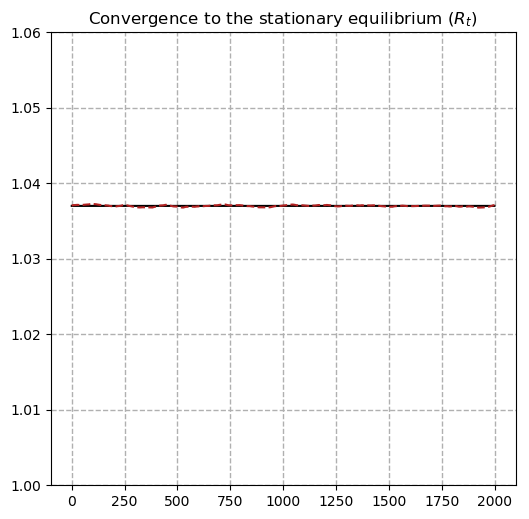

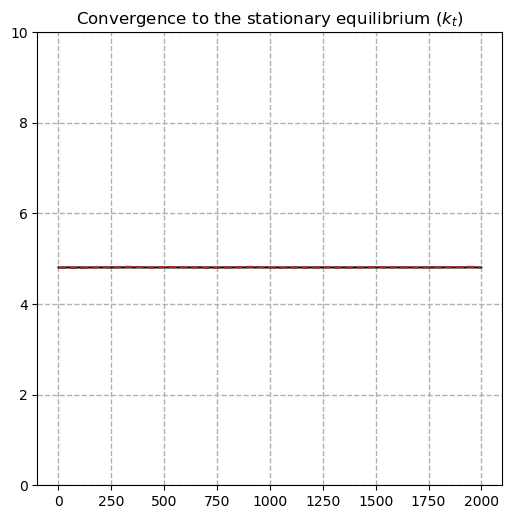

In [6]:
# a. figure of R
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(1,1,1)

ts = np.arange(model.ss_simT)
ax.plot(ts,model.R_ss*np.ones(model.ss_simT),'-',color='black')
ax.plot(ts,model.R_func(model.ss_sim_k),'--',color='firebrick')

ax.grid(ls='--',lw=1)
ax.set_ylim([1.00,1.06])
ax.set_title('Convergence to the stationary equilibrium ($R_t$)')

# b. figure of k
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(1,1,1)

ts = np.arange(model.ss_simT)
ax.plot(ts,model.k_ss*np.ones(model.ss_simT),'-',color='black')
ax.plot(ts,model.ss_sim_k,'--',color='firebrick')

ax.grid(ls='--',lw=1)
ax.set_ylim([0,10])
ax.set_title('Convergence to the stationary equilibrium ($k_t$)')

## Consumption functions

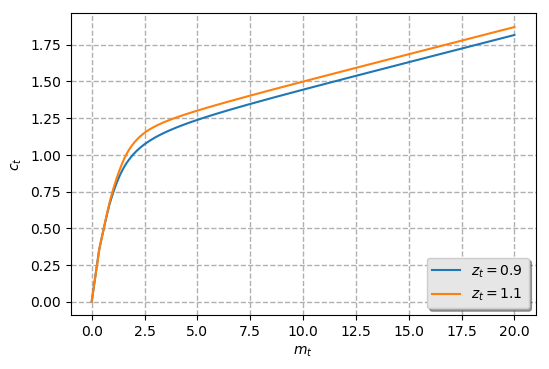

In [7]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

for z in range(model.Nz):
    ax.plot(model.grid_m,model.c_inf[z,:],label=f'$z_t = {model.grid_z[z]:.2}$')

ax.grid(ls='--',lw=1)
ax.set_xlabel('$m_t$')
ax.set_ylabel('$c_t$')
        
legend = ax.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

fig.savefig('figs/Aiyagari_consumption_functions.pdf')

## Stationary distribution

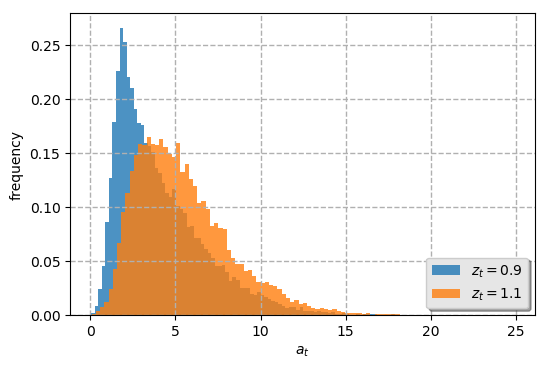

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

for z in range(model.Nz):
    I = model.ss_sim_z == z
    ax.hist(model.ss_sim_a[I],label=f'$z_t = {model.grid_z[z]:.2}$',alpha=0.80,bins=100,density=True)

ax.grid(ls='--',lw=1)
ax.set_xlabel('$a_t$')
ax.set_ylabel('frequency')
        
legend = ax.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

fig.savefig('figs/Aiyagari_stationary_distribution.pdf')

# Find transition path

In [9]:
# a. initial values
I = np.random.choice(model.ss_simN,size=model.transN)
model.trans_sim_a0 = 0.95*model.ss_sim_a[I] 
model.trans_sim_z0 = model.ss_sim_z[I] 

# b. find transition math
R_ini = model.R_ss
mu = 0.00 # convergence rate
model.find_transition_path(mu)

finding transition path
  0: 0.02341617
  1: 0.01195237
  5: 0.00302989
 10: 0.00126239
 15: 0.00056218
 20: 0.00029470
 25: 0.00016771


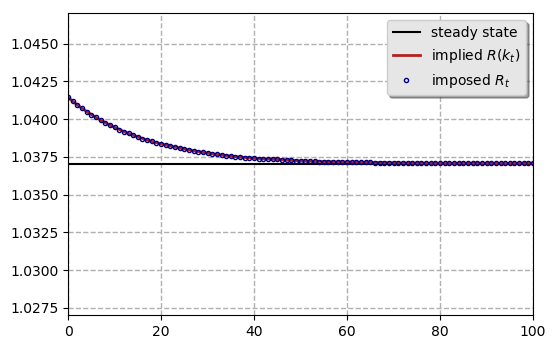

In [10]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

ts = np.arange(model.transT)
ax.plot(ts,model.R_ss*np.ones(model.transT),'-',color='black',label='steady state')
ax.plot(ts,model.R_func(model.sim_k),'-',lw=2,color='firebrick',label='implied $R(k_t)$')
ax.plot(ts,model.sim_R,'o',markersize=3,markerfacecolor='None',markeredgecolor='navy',label='imposed $R_t$')

ax.grid(ls='--',lw=1)
ax.set_xlim([0,100])
ax.set_ylim([model.R_ss-0.01,model.R_ss+0.01])
        
legend = ax.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

fig.savefig('figs/Aiyagari_transition_path.pdf')